### <center>📜 **<font color="green">Question 4:</font> The price of the accommodation by district and the statistics of the area of ​​the rooms (how much space most of the rooms occupy) and the link between the amount and the area of ​​each district (which is the most expensive or the average district). Why is that?** </center>


#### 📙**Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

### ✨ **1. Get data preprocessing**

In [3]:
# Read the data
df = pd.read_csv('../data/processed/VN_housing_dataset.csv')  
df.head(10)

,date,address,district,town,house_type,paper_type,num_floors,num_rooms,squares,price_per_m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46,86.96
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa có sổ,0,3,37,116.22
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40,65.00
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,0,6,51,100.00
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Chưa có sổ,0,4,36,86.11
5,2020-08-05,"Đường Yên Hòa, Phường Yên Hoà, Quận Cầu Giấy, ...",Quận Cầu Giấy,Phường Yên Hoà,"Nhà ngõ, hẻm",Đã có sổ,0,10,46,104.35
6,2020-08-05,"Đường Tây Sơn, Phường Trung Liệt, Quận Đống Đa...",Quận Đống Đa,Phường Trung Liệt,"Nhà ngõ, hẻm",Chưa có sổ,0,3,52,112.50
7,2020-08-05,"Đường Lò Đúc, Phường Đống Mác, Quận Hai Bà Trư...",Quận Hai Bà Trưng,Phường Đống Mác,"Nhà mặt phố, mặt tiền",Đã có sổ,6,5,32,184.38
8,2020-08-05,"Đường Xuân La, Phường Xuân La, Quận Tây Hồ, Hà...",Quận Tây Hồ,Phường Xuân La,"Nhà ngõ, hẻm",Chưa có sổ,0,4,75,120.00
9,2020-08-05,"Đường 19/5, Phường Văn Quán, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Văn Quán,"Nhà ngõ, hẻm",Đã có sổ,4,3,41,64.63


### 🔥**2.Statistics on price and area of ​​each district.**

In [5]:
# create new column price_per_square_meter
df['price'] = df['price_per_m2'] * df['squares']

# group by district and calculate average price, acreage, price_per_square_meter
price = round(df.groupby('district').price.mean().sort_values(ascending=False), 3)

# create dataframe has district, price and acreage
new_df = pd.DataFrame({'district':price.index, 'price': price.values})

# sort by price_per_square_meter
new_df = new_df.sort_values(by='price', ascending=False)
new_df

,district,price
0,Quận Hoàn Kiếm,18148.061
1,Huyện Quốc Oai,10944.006
2,Huyện Ba Vì,9648.500
3,Huyện Phú Xuyên,8888.660
4,Quận Tây Hồ,8601.886
5,Huyện Thường Tín,7089.722
6,Quận Cầu Giấy,6624.847
7,Quận Ba Đình,6474.747
8,Huyện Gia Lâm,6160.107
9,Thị xã Sơn Tây,5769.646


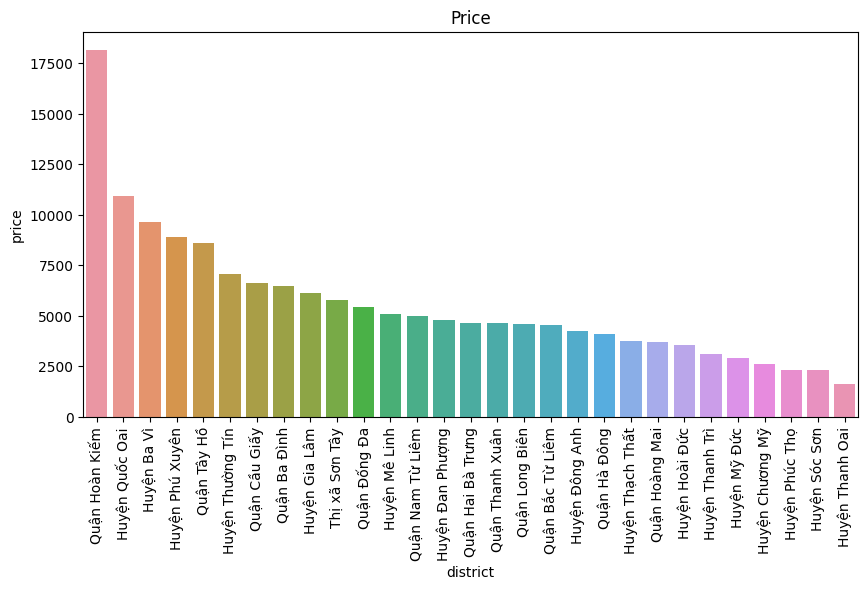

In [7]:
# visualize the price per square meter
plt.figure(figsize=(10, 5))
sns.barplot(x=new_df['district'], y=new_df['price'])
plt.xticks(rotation=90)
plt.title('Price')
plt.show()

>- <b>Comments:</b>
>   - Based on the chart above, we can see that the rent of accommodation in District 1, District 3 is quite high compared to other districts (average 180000-190000/m^2). This may be due to the location of these districts in the city center, so many people rent rooms here.
>   - Hoc Mon and Cu Chi districts are located far from the city center, with few schools and industrial parks, so the demand for rental accommodation here is quite small, so the rental price here is lower than other districts.(only) about 60000-80000/m^2)
>   - The rest, the rental price in other districts is at the average level with the income of the people of the City. Because these districts are located near the city center, it is also convenient for students, students as well as workers.

### 📌3. For each district, show the percentage of acreage 

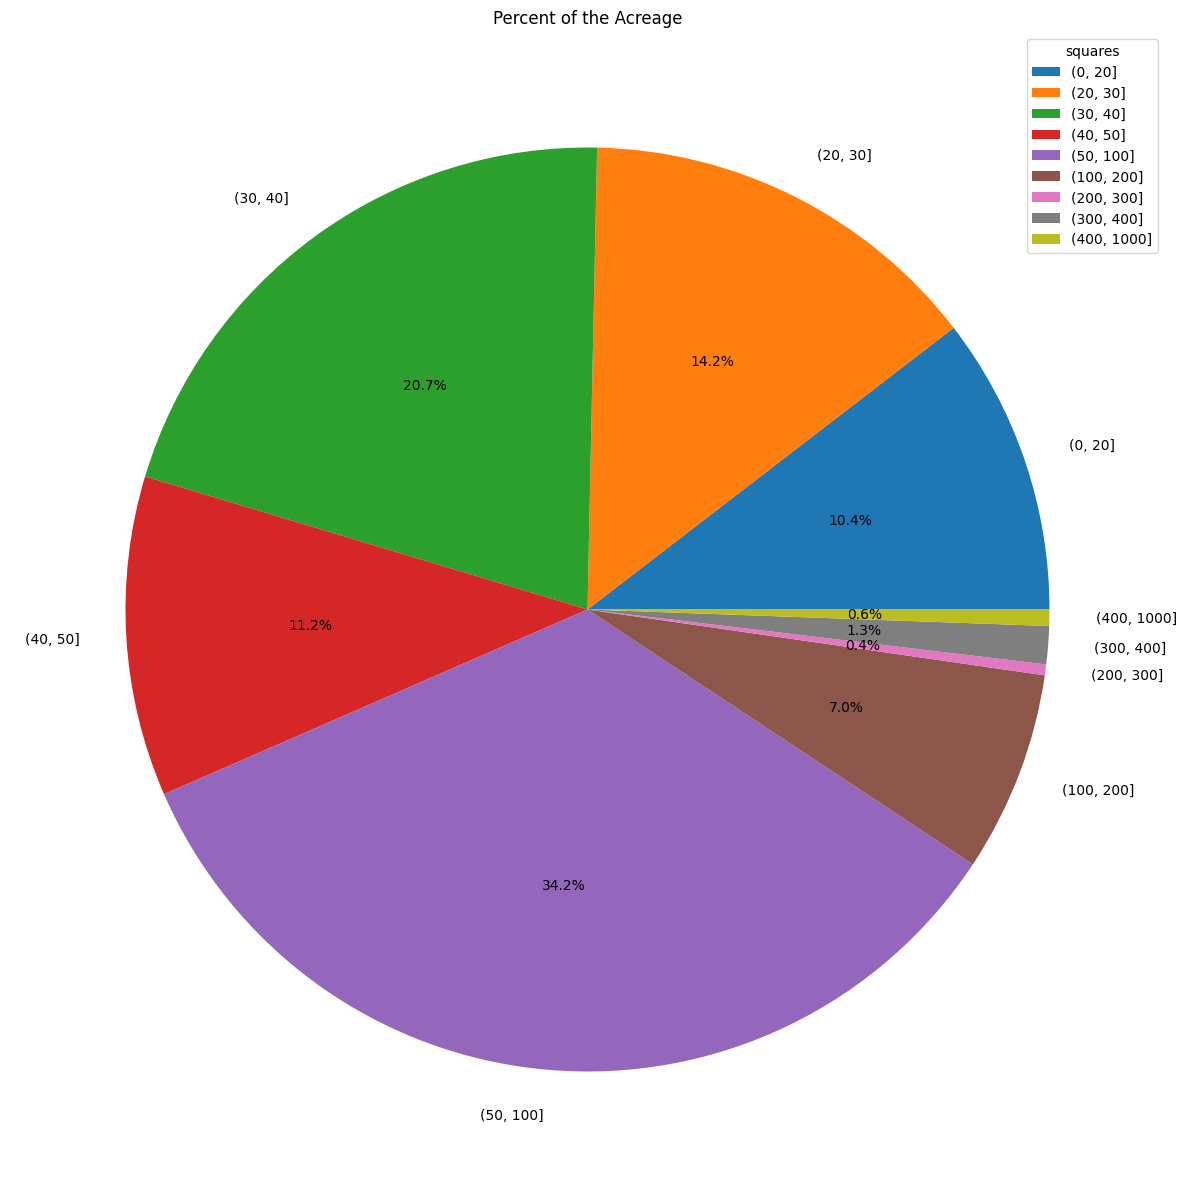

In [22]:
#choose district to visualize percent of the acreage
district = 'Quận Hoàn Kiếm'
choose_district = df[df['district'] == district]
choose_district = choose_district.sort_values(by='squares', ascending=False)
bins = [0, 20, 30, 40, 50, 100, 200, 300, 400, 1000]
df['binned'] = pd.cut(df['squares'], bins)

# calculate the percent of the acreage
percent = choose_district['binned'].value_counts(normalize=True)
percent = percent.sort_index()

# plot the percent of the acreage with pie chart with annotation
plt.figure(figsize=(15, 15))
plt.pie(percent, labels=percent.index, autopct='%1.1f%%')
plt.title('Percent of the Acreage')
plt.legend(title='squares')
plt.show()

&#9889; <font color="yellow"><b>What are benefits of finding the answer? </b></font>
>- Knowing the price of accommodation in each district, combined with the area, we will know how different each district will be.
>- From there, you can find the right accommodation for each person's needs.

### 📌4. For chosen district, price analysis by street

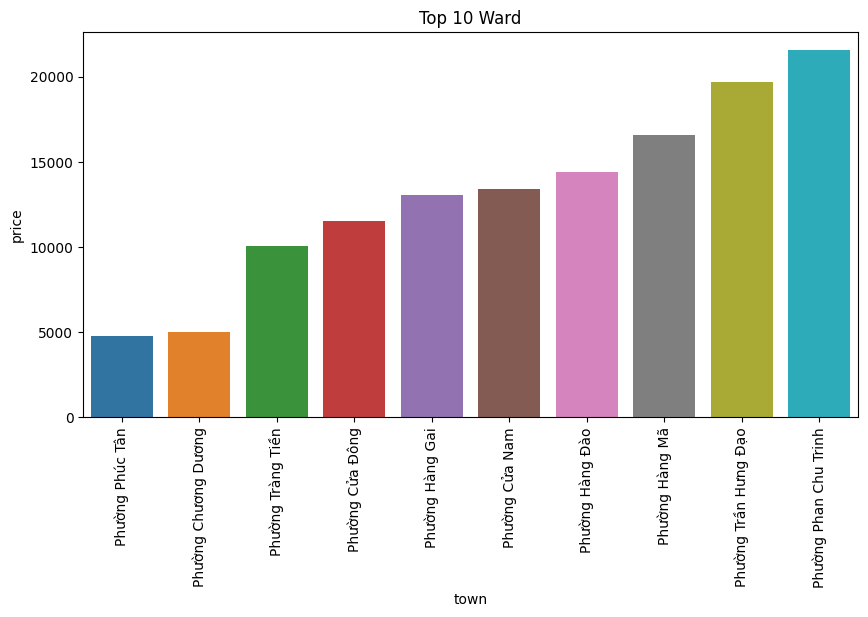

In [25]:
# choose district and get the list of ward
district = 'Quận Hoàn Kiếm'
choose_district = df[df['district'] == district]
ward_list = choose_district['town'].unique()
ward_list

# group by ward and get the mean of price
grouped = choose_district.groupby('town')
ward_mean = grouped['price'].mean()
ward_mean

# create a new dataframe
df_ward = pd.DataFrame(ward_mean)
df_ward = df_ward.sort_values(by='price', ascending=True)

df_ward_top10 = df_ward.head(10)
# visualize top 10 in bar chart seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=df_ward_top10.index, y=df_ward_top10['price'])
plt.xticks(rotation=90)
plt.title('Top 10 Ward')
plt.show()


&#9889; <font color="yellow"><b>What are benefits of finding the answer? </b></font>
>- Helps tenants find addresses with rents that fit their budget because statistics by street in the district help tenants have a more intuitive view.